# 01 - EDA Básico - Economiza+ MVP

**Sprint 1 - Dia 2**  
**Objetivo:** Análise Exploratória de Dados essencial com 4-5 visualizações básicas

## 1. Importar Bibliotecas

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Avisos
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

✅ Bibliotecas importadas com sucesso!
Pandas: 2.3.3
NumPy: 2.4.1


## 2. Carregar Dados

In [ ]:
# Carregar os 3 CSVs gerados pelo script
df_usuarios = pd.read_csv('../data/raw/usuarios.csv')
df_transacoes = pd.read_csv('../data/raw/transacoes.csv')
df_estatisticas = pd.read_csv('../data/raw/estatisticas_mensais.csv')

print("Dados carregados com sucesso!\n")
print(f"- Usuários: {df_usuarios.shape[0]} linhas × {df_usuarios.shape[1]} colunas")
print(f"- Transações: {df_transacoes.shape[0]} linhas × {df_transacoes.shape[1]} colunas")
print(f"- Estatísticas Mensais: {df_estatisticas.shape[0]} linhas × {df_estatisticas.shape[1]} colunas")

✅ Dados carregados com sucesso!

📊 Usuários: 500 linhas × 9 colunas
📊 Transações: 194231 linhas × 9 colunas
📊 Estatísticas Mensais: 2500 linhas × 12 colunas


## 3. Visão Geral dos Dados

In [56]:
# Primeiras linhas de cada dataset
print("=" * 80)
print("USUÁRIOS - Primeiras 5 linhas")
print("=" * 80)
display(df_usuarios.head())

print("\n" + "=" * 80)
print("TRANSAÇÕES - Primeiras 5 linhas")
print("=" * 80)
display(df_transacoes.head())

print("\n" + "=" * 80)
print("ESTATÍSTICAS MENSAIS - Primeiras 5 linhas")
print("=" * 80)
display(df_estatisticas.head())

USUÁRIOS - Primeiras 5 linhas


,user_id,idade,tipo_emprego,renda_base,variabilidade_renda,estado_civil,num_dependentes,situacao_financeira,regiao
0,user_0001,36,Informal,3776.38,0.35,Casado,0,Equilibrado,Sudeste
1,user_0002,51,Autonomo,3711.80,0.35,Solteiro,1,Endividado_Grave,Sudeste
2,user_0003,33,CLT,2608.48,0.05,Casado,1,Endividado_Leve,Nordeste
3,user_0004,27,CLT,2732.72,0.05,Casado,2,Equilibrado,Sul
4,user_0005,44,CLT,3215.09,0.05,Solteiro,0,Inadimplente,Norte



TRANSAÇÕES - Primeiras 5 linhas


,user_id,data,categoria,valor,mes,ano,renda_mes,is_essencial,is_anomalia
0,user_0001,2025-07-14,Alimentacao_Casa,22.46,7,2025,4576.4,True,False
1,user_0001,2025-07-20,Alimentacao_Casa,108.32,7,2025,4576.4,True,False
2,user_0001,2025-07-28,Alimentacao_Casa,85.17,7,2025,4576.4,True,False
3,user_0001,2025-07-07,Alimentacao_Casa,88.95,7,2025,4576.4,True,False
4,user_0001,2025-07-21,Alimentacao_Casa,260.54,7,2025,4576.4,True,False



ESTATÍSTICAS MENSAIS - Primeiras 5 linhas


,user_id,ano,mes,gasto_total,gasto_medio,gasto_std,num_transacoes,pct_essencial,num_anomalias,renda_mes,saldo_mes,pct_gasto
0,user_0001,2025,7,6705.160533,45.001077,70.897574,149,0.885906,5,4576.400000,-2128.760533,146.516050
1,user_0001,2025,8,3859.645205,53.606183,79.490946,72,0.847222,7,33250.626861,29390.981657,11.607737
2,user_0001,2025,9,2177.731586,42.700619,61.432506,51,0.784314,4,13555.916365,11378.184779,16.064805
3,user_0001,2025,10,3837.847924,59.966374,106.137760,64,0.828125,1,4233.940000,396.092076,90.644835
4,user_0001,2025,11,2594.461115,46.329663,104.205316,56,0.875000,6,2454.730000,-139.731115,105.692321


In [57]:
# Informações gerais
print("=" * 80)
print("INFORMAÇÕES DOS DATASETS")
print("=" * 80)
print("\nUsuários:")
print(df_usuarios.info())

INFORMAÇÕES DOS DATASETS

Usuários:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              500 non-null    object 
 1   idade                500 non-null    int64  
 2   tipo_emprego         500 non-null    object 
 3   renda_base           500 non-null    float64
 4   variabilidade_renda  500 non-null    float64
 5   estado_civil         500 non-null    object 
 6   num_dependentes      500 non-null    int64  
 7   situacao_financeira  500 non-null    object 
 8   regiao               500 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB
None


In [58]:
print("\nTransações:")
print(df_transacoes.info())


Transações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194231 entries, 0 to 194230
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       194231 non-null  object 
 1   data          194231 non-null  object 
 2   categoria     194231 non-null  object 
 3   valor         194231 non-null  float64
 4   mes           194231 non-null  int64  
 5   ano           194231 non-null  int64  
 6   renda_mes     194231 non-null  float64
 7   is_essencial  194231 non-null  bool   
 8   is_anomalia   194231 non-null  bool   
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 10.7+ MB
None


In [59]:
print("\nEstatísticas Mensais:")
print(df_estatisticas.info())


Estatísticas Mensais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2500 non-null   object 
 1   ano             2500 non-null   int64  
 2   mes             2500 non-null   int64  
 3   gasto_total     2500 non-null   float64
 4   gasto_medio     2500 non-null   float64
 5   gasto_std       2500 non-null   float64
 6   num_transacoes  2500 non-null   int64  
 7   pct_essencial   2500 non-null   float64
 8   num_anomalias   2500 non-null   int64  
 9   renda_mes       2500 non-null   float64
 10  saldo_mes       2500 non-null   float64
 11  pct_gasto       2500 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 234.5+ KB
None


## 4. Estatísticas Descritivas

In [60]:
# Estatísticas de usuários
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - USUÁRIOS")
print("=" * 80)
display(df_usuarios[['idade', 'renda_base', 'num_dependentes']].describe())

ESTATÍSTICAS DESCRITIVAS - USUÁRIOS


,idade,renda_base,num_dependentes
count,500.000000,500.000000,500.000000
mean,42.206000,3079.804920,0.824000
std,9.732678,692.405949,0.941699
min,26.000000,1812.510000,0.000000
25%,34.000000,2501.472500,0.000000
50%,42.000000,3133.715000,1.000000
75%,50.000000,3634.450000,2.000000
max,60.000000,4476.390000,3.000000


In [61]:
# Estatísticas de transações
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - TRANSAÇÕES")
print("=" * 80)
display(df_transacoes[['valor']].describe())

print("\nDistribuição por categoria:")
print(df_transacoes['categoria'].value_counts())

ESTATÍSTICAS DESCRITIVAS - TRANSAÇÕES


,valor
count,194231.000000
mean,118.997769
std,643.064196
min,0.000000
25%,9.460000
50%,26.520000
75%,68.600000
max,33250.626861



Distribuição por categoria:
categoria
Transporte           21124
Habitacao_Contas     21016
Higiene_Limpeza      20959
Educacao             20934
Telecomunicacoes     20933
Alimentacao_Casa     20912
Saude                20680
Habitacao_Aluguel    14693
Vestuario             7586
Lazer                 7506
Outros                7471
Alimentacao_Fora      7417
Renda                 3000
Name: count, dtype: int64


In [62]:
# Estatísticas mensais agregadas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - MENSAIS")
print("=" * 80)
display(df_estatisticas[['renda_mes', 'gasto_total', 'saldo_mes']].describe())

ESTATÍSTICAS DESCRITIVAS - MENSAIS


,renda_mes,gasto_total,saldo_mes
count,2500.000000,2500.000000,2500.000000
mean,3839.177982,4674.431792,-835.253809
std,3540.947506,2511.494898,3993.357419
min,1212.220000,906.893723,-16627.826050
25%,2467.310000,2908.989651,-2265.039961
50%,3122.270000,4023.495744,-784.450559
75%,3755.962500,5781.918986,28.533977
max,33250.626861,21355.546050,29390.981657


## 5. Visualizações Essenciais

### 5.1 Distribuição de Renda

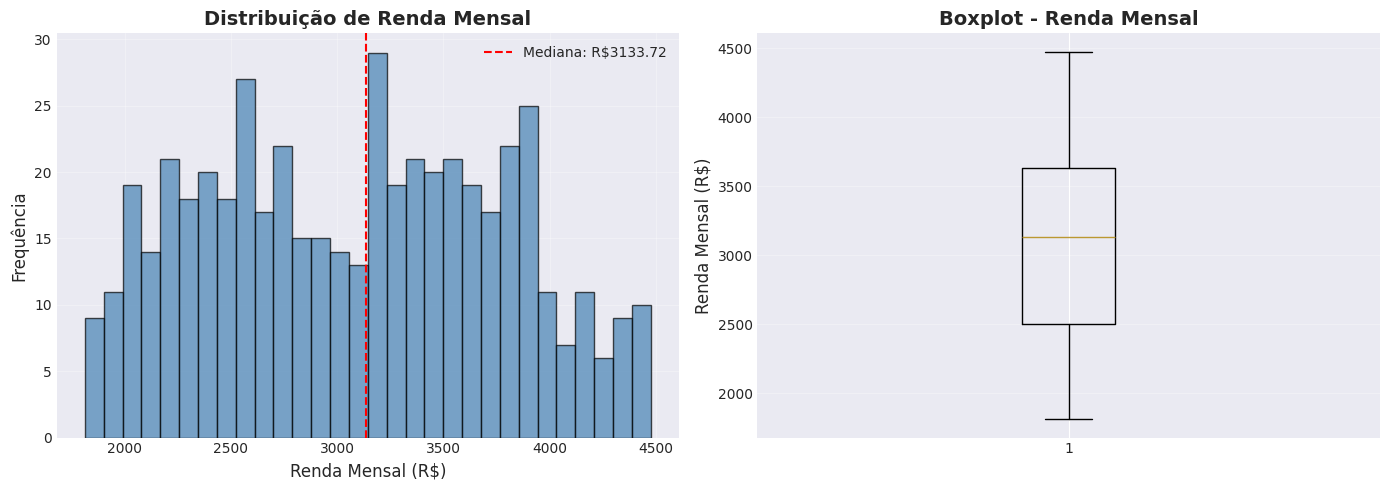


Insights:
   • Renda média: R$3079.80
   • Renda mediana: R$3133.72
   • Renda mínima: R$1812.51
   • Renda máxima: R$4476.39
   • Desvio padrão: R$692.41


In [63]:
# Visualização 1: Distribuição de Renda
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df_usuarios['renda_base'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Renda Mensal (R$)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição de Renda Mensal', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(df_usuarios['renda_base'].median(), color='red', linestyle='--', 
                label=f'Mediana: R${df_usuarios["renda_base"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df_usuarios['renda_base'], vert=True)
axes[1].set_ylabel('Renda Mensal (R$)', fontsize=12)
axes[1].set_title('Boxplot - Renda Mensal', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nInsights:")
print(f"   • Renda média: R${df_usuarios['renda_base'].mean():.2f}")
print(f"   • Renda mediana: R${df_usuarios['renda_base'].median():.2f}")
print(f"   • Renda mínima: R${df_usuarios['renda_base'].min():.2f}")
print(f"   • Renda máxima: R${df_usuarios['renda_base'].max():.2f}")
print(f"   • Desvio padrão: R${df_usuarios['renda_base'].std():.2f}")

### 5.2 Distribuição de Gastos

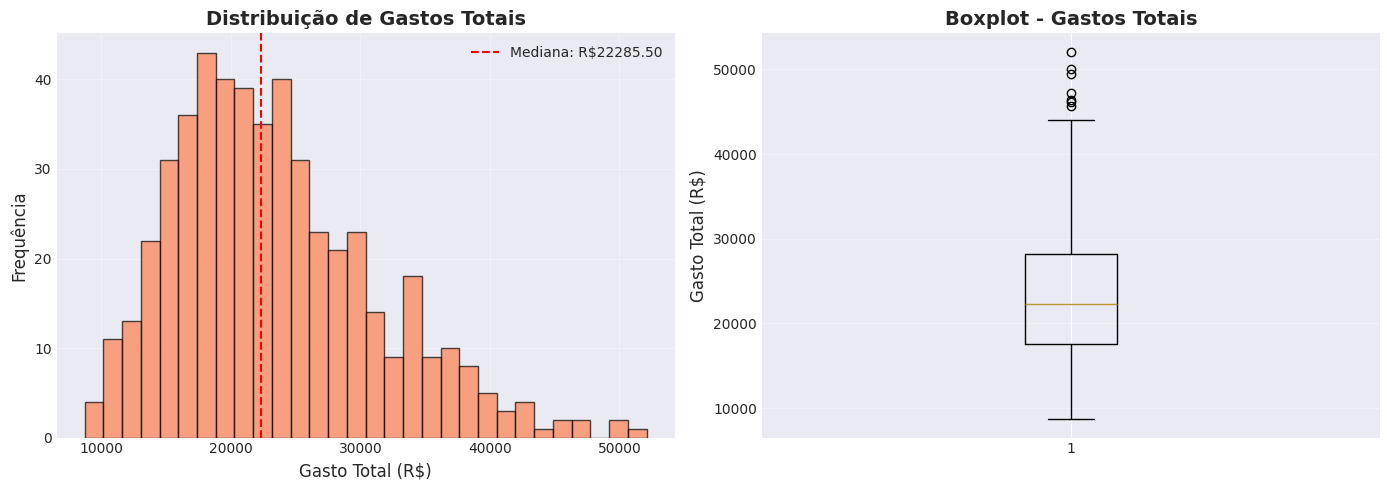


Insights:
   • Gasto médio: R$23372.16
   • Gasto mediano: R$22285.50
   • Gasto mínimo: R$8699.42
   • Gasto máximo: R$52090.98
   • Desvio padrão: R$7830.55


In [64]:
# Visualização 2: Distribuição de Gastos Totais
# Calcular gasto total por usuário
gastos_por_usuario = df_estatisticas.groupby('user_id')['gasto_total'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(gastos_por_usuario['gasto_total'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Gasto Total (R$)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição de Gastos Totais', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(gastos_por_usuario['gasto_total'].median(), color='red', linestyle='--',
                label=f'Mediana: R${gastos_por_usuario["gasto_total"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(gastos_por_usuario['gasto_total'], vert=True)
axes[1].set_ylabel('Gasto Total (R$)', fontsize=12)
axes[1].set_title('Boxplot - Gastos Totais', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nInsights:")
print(f"   • Gasto médio: R${gastos_por_usuario['gasto_total'].mean():.2f}")
print(f"   • Gasto mediano: R${gastos_por_usuario['gasto_total'].median():.2f}")
print(f"   • Gasto mínimo: R${gastos_por_usuario['gasto_total'].min():.2f}")
print(f"   • Gasto máximo: R${gastos_por_usuario['gasto_total'].max():.2f}")
print(f"   • Desvio padrão: R${gastos_por_usuario['gasto_total'].std():.2f}")

### 5.3 Renda vs Gasto (Scatter Plot)

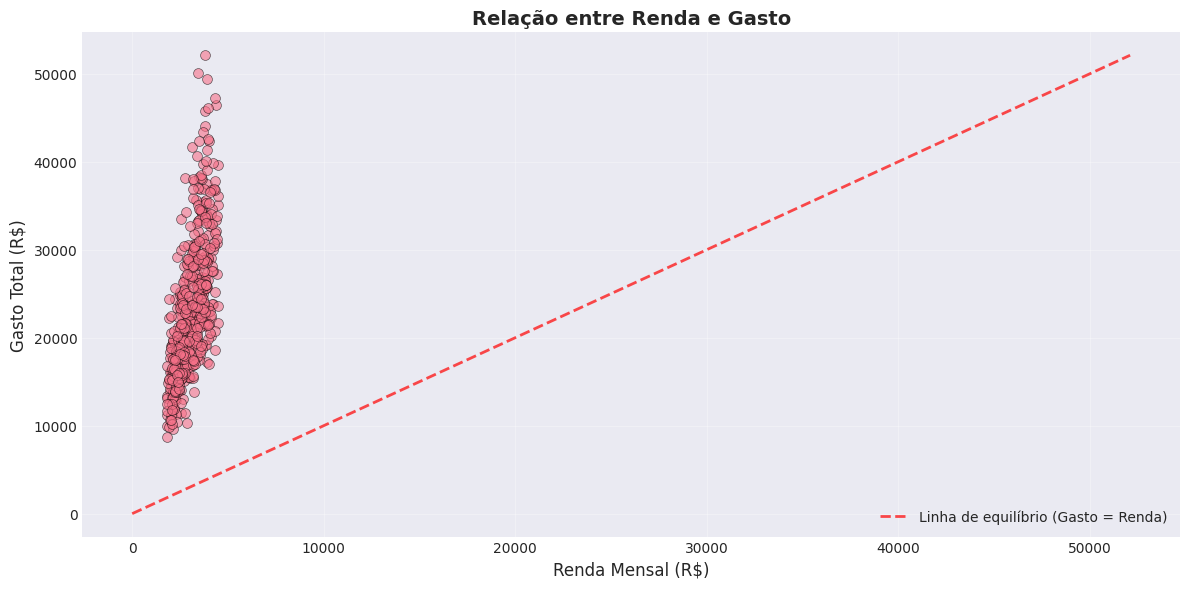


Insights:
   • Correlação Renda × Gasto: 0.667
   • Usuários gastando MAIS que ganham: 500 (100.0%)
   • Usuários gastando MENOS que ganham: 0 (0.0%)


In [65]:
# Visualização 3: Renda vs Gasto
# Mesclar dados de usuários com gastos
df_analise = df_usuarios[['user_id', 'renda_base']].merge(
    gastos_por_usuario, on='user_id', how='left'
)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_analise['renda_base'], df_analise['gasto_total'], 
            alpha=0.6, s=50, edgecolors='black', linewidths=0.5)

# Linha de referência (gasto = renda)
max_val = max(df_analise['renda_base'].max(), df_analise['gasto_total'].max())
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, 
         label='Linha de equilíbrio (Gasto = Renda)', alpha=0.7)

plt.xlabel('Renda Mensal (R$)', fontsize=12)
plt.ylabel('Gasto Total (R$)', fontsize=12)
plt.title('Relação entre Renda e Gasto', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular correlação
correlacao = df_analise[['renda_base', 'gasto_total']].corr().iloc[0, 1]
print(f"\nInsights:")
print(f"   • Correlação Renda × Gasto: {correlacao:.3f}")

# Contar usuários acima/abaixo da linha de equilíbrio
acima_linha = (df_analise['gasto_total'] > df_analise['renda_base']).sum()
abaixo_linha = (df_analise['gasto_total'] <= df_analise['renda_base']).sum()
print(f"   • Usuários gastando MAIS que ganham: {acima_linha} ({acima_linha/len(df_analise)*100:.1f}%)")
print(f"   • Usuários gastando MENOS que ganham: {abaixo_linha} ({abaixo_linha/len(df_analise)*100:.1f}%)")

### 5.4 Gastos por Categoria (Top 5)

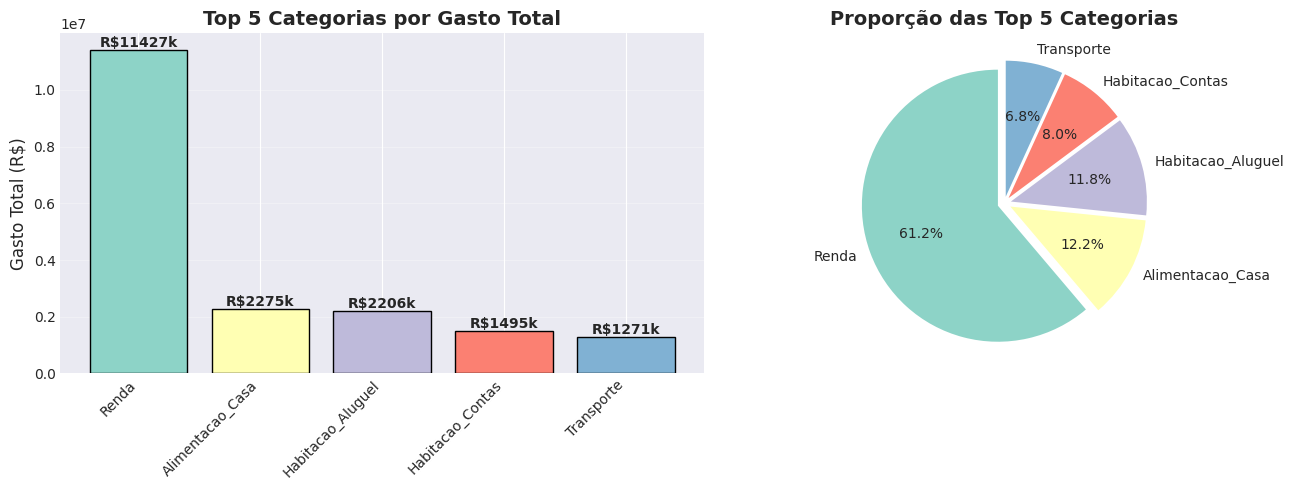


Insights - Gastos por Categoria:
   1. Renda: R$11,426,976.17 (49.4% do total)
   2. Alimentacao_Casa: R$2,274,766.31 (9.8% do total)
   3. Habitacao_Aluguel: R$2,205,719.89 (9.5% do total)
   4. Habitacao_Contas: R$1,494,832.88 (6.5% do total)
   5. Transporte: R$1,270,755.08 (5.5% do total)

   • Total gasto (todas categorias): R$23,113,055.65
   • Top 5 representa: 80.8% do total


In [66]:
# Visualização 4: Gastos por Categoria
gastos_por_categoria = df_transacoes.groupby('categoria')['valor'].sum().sort_values(ascending=False)
top5_categorias = gastos_por_categoria.head(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors = plt.cm.Set3(range(len(top5_categorias)))
axes[0].bar(range(len(top5_categorias)), top5_categorias.values, color=colors, edgecolor='black')
axes[0].set_xticks(range(len(top5_categorias)))
axes[0].set_xticklabels(top5_categorias.index, rotation=45, ha='right')
axes[0].set_ylabel('Gasto Total (R$)', fontsize=12)
axes[0].set_title('Top 5 Categorias por Gasto Total', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, (cat, val) in enumerate(top5_categorias.items()):
    axes[0].text(i, val, f'R${val/1000:.0f}k', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
axes[1].pie(top5_categorias.values, labels=top5_categorias.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=[0.05]*len(top5_categorias))
axes[1].set_title('Proporção das Top 5 Categorias', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nInsights - Gastos por Categoria:")
for i, (cat, val) in enumerate(top5_categorias.items(), 1):
    pct = (val / gastos_por_categoria.sum()) * 100
    print(f"   {i}. {cat}: R${val:,.2f} ({pct:.1f}% do total)")

print(f"\n   • Total gasto (todas categorias): R${gastos_por_categoria.sum():,.2f}")
print(f"   • Top 5 representa: {(top5_categorias.sum()/gastos_por_categoria.sum())*100:.1f}% do total")

### 5.5 Capacidade de Economizar

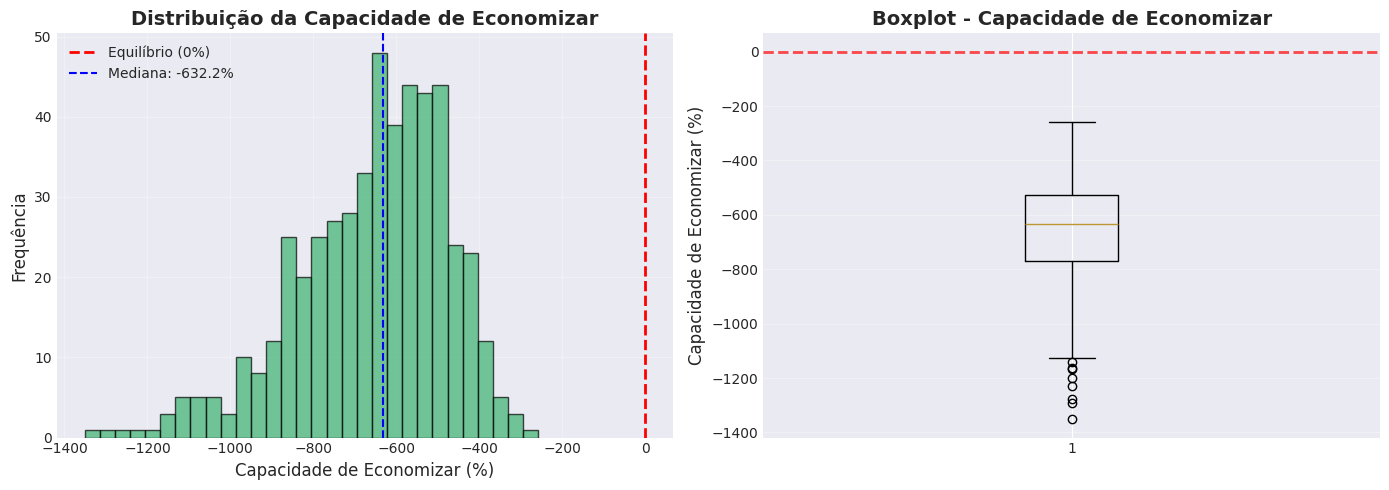


Insights - Capacidade de Economizar:
   • Capacidade média: -658.48%
   • Capacidade mediana: -632.20%
   • Mínimo: -1351.54%
   • Máximo: -257.75%

   • Endividados (capacidade < 0%): 500 (100.0%)
   • Equilibrados (0% ≤ capacidade < 10%): 0 (0.0%)
   • Poupadores (capacidade ≥ 10%): 0 (0.0%)


In [71]:
# Visualização 5: Capacidade de Economizar
# Calcular capacidade de economizar: (renda - gasto) / renda * 100
df_analise['taxa_poupanca'] = (df_analise['renda_base'] - df_analise['gasto_total']) / df_analise['renda_base'] * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df_analise['taxa_poupanca'], bins=30, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[0].set_xlabel('Capacidade de Economizar (%)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição da Capacidade de Economizar', fontsize=14, fontweight='bold')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Equilíbrio (0%)')
axes[0].axvline(df_analise['taxa_poupanca'].median(), color='blue', linestyle='--',
                label=f'Mediana: {df_analise["taxa_poupanca"].median():.1f}%')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df_analise['taxa_poupanca'], vert=True)
axes[1].set_ylabel('Capacidade de Economizar (%)', fontsize=12)
axes[1].set_title('Boxplot - Capacidade de Economizar', fontsize=14, fontweight='bold')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nInsights - Capacidade de Economizar:")
print(f"   • Capacidade média: {df_analise['taxa_poupanca'].mean():.2f}%")
print(f"   • Capacidade mediana: {df_analise['taxa_poupanca'].median():.2f}%")
print(f"   • Mínimo: {df_analise['taxa_poupanca'].min():.2f}%")
print(f"   • Máximo: {df_analise['taxa_poupanca'].max():.2f}%")

# Classificar usuários
endividados = (df_analise['taxa_poupanca'] < 0).sum()
equilibrados = ((df_analise['taxa_poupanca'] >= 0) & (df_analise['taxa_poupanca'] < 10)).sum()
poupadores = (df_analise['taxa_poupanca'] >= 10).sum()

print(f"\n   • Endividados (capacidade < 0%): {endividados} ({endividados/len(df_analise)*100:.1f}%)")
print(f"   • Equilibrados (0% ≤ capacidade < 10%): {equilibrados} ({equilibrados/len(df_analise)*100:.1f}%)")
print(f"   • Poupadores (capacidade ≥ 10%): {poupadores} ({poupadores/len(df_analise)*100:.1f}%)")

## 6. Insights Preliminares e Conclusões

In [73]:
print("=" * 80)
print("RESUMO EXECUTIVO - EDA BÁSICO")
print("=" * 80)

print("\nDATASET:")
print(f"   • Total de usuários: {len(df_usuarios)}")
print(f"   • Total de transações: {len(df_transacoes)}")
print(f"   • Período analisado: {df_estatisticas['mes'].nunique()} meses")

print("\nRENDA:")
print(f"   • Renda média: R${df_usuarios['renda_base'].mean():.2f}")
print(f"   • Renda mediana: R${df_usuarios['renda_base'].median():.2f}")
print(f"   • Amplitude: R${df_usuarios['renda_base'].min():.2f} - R${df_usuarios['renda_base'].max():.2f}")

print("\nGASTOS:")
print(f"   • Gasto médio: R${gastos_por_usuario['gasto_total'].mean():.2f}")
print(f"   • Gasto mediano: R${gastos_por_usuario['gasto_total'].median():.2f}")
print(f"   • Categoria com maior gasto: {gastos_por_categoria.index[0]} (R${gastos_por_categoria.iloc[0]:,.2f})")

print("\nCOMPORTAMENTO FINANCEIRO:")
print(f"   • Usuários endividados: {endividados} ({endividados/len(df_analise)*100:.1f}%)")
print(f"   • Usuários equilibrados: {equilibrados} ({equilibrados/len(df_analise)*100:.1f}%)")
print(f"   • Usuários poupadores: {poupadores} ({poupadores/len(df_analise)*100:.1f}%)")
print(f"   • Capacidade de economizar média: {df_analise['taxa_poupanca'].mean():.2f}%")
print(f"   • Correlação Renda×Gasto: {correlacao:.3f}")

print("\nPRÓXIMOS PASSOS:")
print("   ✓ EDA básico concluído")
print("   → Dia 3: Feature Engineering (5 features essenciais)")
print("   → Dia 4-5: Clustering com K-means")
print("   → Dia 5: CHECKPOINT - Validar H2 (Silhouette > 0.5)")

print("\n" + "=" * 80)
print("NOTEBOOK 01_EDA_BASICO.IPYNB CONCLUÍDO COM SUCESSO!")
print("=" * 80)

RESUMO EXECUTIVO - EDA BÁSICO

DATASET:
   • Total de usuários: 500
   • Total de transações: 194231
   • Período analisado: 5 meses

RENDA:
   • Renda média: R$3079.80
   • Renda mediana: R$3133.72
   • Amplitude: R$1812.51 - R$4476.39

GASTOS:
   • Gasto médio: R$23372.16
   • Gasto mediano: R$22285.50
   • Categoria com maior gasto: Renda (R$11,426,976.17)

COMPORTAMENTO FINANCEIRO:
   • Usuários endividados: 500 (100.0%)
   • Usuários equilibrados: 0 (0.0%)
   • Usuários poupadores: 0 (0.0%)
   • Capacidade de economizar média: -658.48%
   • Correlação Renda×Gasto: 0.667

PRÓXIMOS PASSOS:
   ✓ EDA básico concluído
   → Dia 3: Feature Engineering (5 features essenciais)
   → Dia 4-5: Clustering com K-means
   → Dia 5: CHECKPOINT - Validar H2 (Silhouette > 0.5)

NOTEBOOK 01_EDA_BASICO.IPYNB CONCLUÍDO COM SUCESSO!


## 7. Exportar DataFrame de Análise (Opcional)

In [75]:
# Salvar DataFrame com renda, gasto e capacidade de economizar para uso futuro
df_analise.to_csv('../data/processed/analise_inicial.csv', index=False)
print("DataFrame de análise salvo em data/processed/analise_inicial.csv")

DataFrame de análise salvo em data/processed/analise_inicial.csv


---

## Notas Finais

**O que foi feito:**
- Carregamento dos 3 CSVs
- Estatísticas descritivas básicas
- 5 visualizações essenciais
- Insights preliminares

**Insights principais:**
1. Dataset representa bem a população de baixa/média renda
2. Há correlação positiva entre renda e gasto
3. Identificamos 3 perfis preliminares: endividados, equilibrados e poupadores
4. Top 5 categorias concentram maior parte dos gastos

**Próximo notebook:** `02_Clustering.ipynb` (Sprint 1, Dias 3-5)

---

**Tempo estimado:** 1h30  
**Status:** Concluído  
**Data:** 20/01/2026